In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv('Advertising.csv')
df.head(3)

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300


In [3]:
df.shape

(200, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TV         200 non-null    int64
 1   radio      200 non-null    int64
 2   newspaper  200 non-null    int64
 3   sales      200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [5]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147042.500000,23264.000000,30554.000000,14022.500000
std,85854.236315,14846.809176,21778.620839,5217.456566
min,700.000000,0.000000,300.000000,1600.000000
25%,74375.000000,9975.000000,12750.000000,10375.000000
50%,149750.000000,22900.000000,25750.000000,12900.000000
75%,218825.000000,36525.000000,45100.000000,17400.000000
max,296400.000000,49600.000000,114000.000000,27000.000000


<AxesSubplot: >

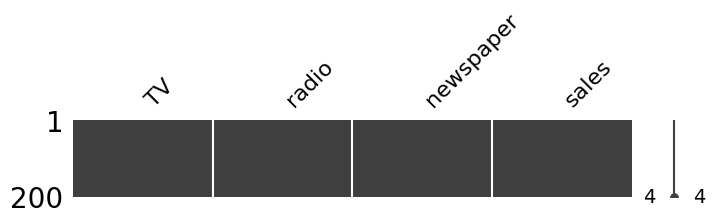

In [6]:
import missingno
missingno.matrix(df, figsize=(8,1))

- no missing values
- since each variable has a lot of unique values we consider all the features as continuous

In [7]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


- No high corr between the independent variables

In [8]:
df.duplicated().sum()

0

## Modelling, Prediction and Evaluation (Base Model) - r2

In [9]:
X = df.drop('sales', axis=1)
y = df['sales']

In [10]:
#MLR
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

y_train_pred = model_linear.predict(X_train)
y_test_pred = model_linear.predict(X_test)

train_score_linear = model_linear.score(X_train, y_train)
test_score_linear = model_linear.score(X_test, y_test)
cvs_score_linear = cross_val_score(model_linear, X, y, cv=5).mean()

print('Intercept:',model_linear.intercept_, '\nCoefficient:', model_linear.coef_)
print('\nTrain score:',train_score_linear, '\nTest score:',test_score_linear, '\nCVS:', cvs_score_linear)

Intercept: 2979.067338122635 
Coefficient: [0.04472952 0.18919505 0.00276111]

Train score: 0.8957008271017817 
Test score: 0.8994380241009119 
CVS: 0.8871063495438435


In [11]:
#Polynomial model with i =3
poly_conv = PolynomialFeatures(degree=3, include_bias=False)
X_poly = pd.DataFrame(poly_conv.fit_transform(X))

X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size=0.2, random_state=42)

model_poly = LinearRegression()

model_poly.fit(X_train, y_train)

y_pred_test = model_poly.predict(X_test)
y_pred_train = model_poly.predict(X_train)

train_score_poly = model_poly.score(X_train, y_train)
test_score_poly = model_poly.score(X_test, y_test)
cvs_score_poly = cross_val_score(model_poly, X_poly, y, cv=5).mean()

print('Intercept:',model_poly.intercept_, '\nCoefficient:', model_poly.coef_)
print('\nTrain score:',train_score_poly, '\nTest score:',test_score_poly, '\nCVS:', cvs_score_poly)

Intercept: 3801.1222491079807 
Coefficient: [ 9.18396812e-02  1.07918850e-02  2.45105162e-02 -4.37011890e-07
  1.35341093e-06 -3.06406059e-07  1.73582806e-07  6.94902786e-07
 -3.67617490e-08  7.37273356e-13 -1.05884102e-12  8.63682737e-13
  2.70329787e-12 -3.41844252e-12  9.83477559e-13 -7.66662570e-12
 -1.20388142e-12 -2.35559310e-12 -1.48000124e-12]

Train score: 0.9916695295575977 
Test score: 0.9906674700872862 
CVS: 0.98856098446927


In [12]:
#Lasso Regression
X = df.drop('sales', axis=1)
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

estimator = Lasso()
param_grid = {'alpha':[i for i in range(1,10)]}

model_hp_lasso = GridSearchCV(estimator, param_grid, cv=5, scoring='r2')
model_hp_lasso.fit(X_train, y_train)
print(model_hp_lasso.best_params_)

model_lasso = Lasso(alpha=0.1) 
model_lasso.fit(X_train, y_train)

train_score_lasso=model_lasso.score(X_train, y_train)
test_score_lasso=model_lasso.score(X_test, y_test)
cvs_score_lasso =cross_val_score(model_lasso,X, y, cv=5).mean()

print('Intercept:',model_lasso.intercept_, '\nCoefficient:', model_lasso.coef_)
print('\nTrain score:',train_score_lasso)
print('Test score:',test_score_lasso)
print('Cross Validation score:',cvs_score_lasso)

{'alpha': 9}
Intercept: 2979.0673523553796 
Coefficient: [0.04472952 0.18919505 0.00276111]

Train score: 0.8957008271017817
Test score: 0.8994380242150258
Cross Validation score: 0.8871063497055447


In [13]:
#Ridge Regression

X = df.drop('sales', axis=1)
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

estimator = Ridge()
param_grid = {'alpha':[i for i in range(1,10)]}

model_hp_Ridge = GridSearchCV(estimator, param_grid, cv=5, scoring='r2')
model_hp_Ridge.fit(X_train, y_train)
print(model_hp_Ridge.best_params_)

model_Ridge = Lasso(alpha=1) 
model_Ridge.fit(X_train, y_train)

train_score_Ridge=model_Ridge.score(X_train, y_train)
test_score_Ridge=model_Ridge.score(X_test, y_test)
cvs_score_Ridge =cross_val_score(model_Ridge,X, y, cv=5).mean()

print('Intercept:',model_Ridge.intercept_, '\nCoefficient:', model_Ridge.coef_)
print('\nTrain score:',train_score_Ridge)
print('Test score:',test_score_Ridge)
print('Cross Validation score:',cvs_score_Ridge)

{'alpha': 9}
Intercept: 2979.067480640402 
Coefficient: [0.04472952 0.18919505 0.00276111]

Train score: 0.8957008271017814
Test score: 0.8994380252459169
Cross Validation score: 0.8871063511014737


In [14]:
#ElasticNet Regression

X = df.drop('sales', axis=1)
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

estimator = ElasticNet()
param_grid = {'alpha':[50, 75, 100, 150], 'l1_ratio':[0.1,0.5,0.9]}

model_hp_elastic = GridSearchCV(estimator, param_grid, cv=5, scoring='r2')
model_hp_elastic.fit(X_train, y_train)
print(model_hp_elastic.best_params_)

model_elastic = ElasticNet(alpha=1, l1_ratio = 0.9) 
model_elastic.fit(X_train, y_train)

train_score_elastic=model_elastic.score(X_train, y_train)
test_score_elastic=model_elastic.score(X_test, y_test)
cvs_score_elastic=cross_val_score(model_elastic,X, y, cv=5).mean()

print('Intercept:',model_elastic.intercept_, '\nCoefficient:', model_elastic.coef_)
print('\nTrain score:',train_score_elastic)
print('Test score:',test_score_elastic)
print('Cross Validation score:',cvs_score_elastic)

{'alpha': 150, 'l1_ratio': 0.9}
Intercept: 2979.0674678103715 
Coefficient: [0.04472952 0.18919505 0.00276111]

Train score: 0.8957008271017816
Test score: 0.8994380251319485
Cross Validation score: 0.8871063509655921


# r2 Scores comparision for all the 5 models on the base model 

In [15]:
#conclusion
score = {'Model':['Linear Regression','Polynomial Regression','Lasso Regression','Ridge Regression','ElasticNet Regression'],
        'Train Score':[train_score_linear,train_score_poly,train_score_lasso,train_score_Ridge,train_score_elastic],
        'Test Score':[test_score_linear,test_score_poly,test_score_lasso,test_score_Ridge,test_score_elastic],
        'CVS':[cvs_score_linear,cvs_score_poly,cvs_score_lasso,cvs_score_Ridge,cvs_score_elastic]}

scores = pd.DataFrame(score)
display(scores)

,Model,Train Score,Test Score,CVS
0,Linear Regression,0.895701,0.899438,0.887106
1,Polynomial Regression,0.991670,0.990667,0.988561
2,Lasso Regression,0.895701,0.899438,0.887106
3,Ridge Regression,0.895701,0.899438,0.887106
4,ElasticNet Regression,0.895701,0.899438,0.887106


**Conclusion:** If we want to select the best model based on the r2 then **Polynomial Regression with degree 3 is the best**